In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [57]:
df_encoded = pd.get_dummies(df)

In [58]:
df_encoded = df_encoded.astype(int)
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


In [59]:
X = df_encoded.drop(['charges'], axis=1)
y = df_encoded['charges']

In [60]:
X.shape

(1338, 11)

In [61]:
y.shape

(1338,)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.2, random_state=48)

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X)

In [66]:
y_pred

array([24317.53153835,  3831.48949114,  7112.74863573, ...,
        4431.016482  ,  1612.15491025, 34714.23334194])

In [67]:
df['Predicted Charges'] = y_pred

In [68]:
df

,age,sex,bmi,children,smoker,region,charges,Predicted Charges
0,19,female,27.900,0,yes,southwest,16884.92400,24317.531538
1,18,male,33.770,1,no,southeast,1725.55230,3831.489491
2,28,male,33.000,3,no,southeast,4449.46200,7112.748636
3,33,male,22.705,0,no,northwest,21984.47061,3249.150559
4,32,male,28.880,0,no,northwest,3866.85520,5349.397745
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,11737.088225
1334,18,female,31.920,0,no,northeast,2205.98080,3876.259006
1335,18,female,36.850,0,no,southeast,1629.83350,4431.016482
1336,21,female,25.800,0,no,southwest,2007.94500,1612.154910


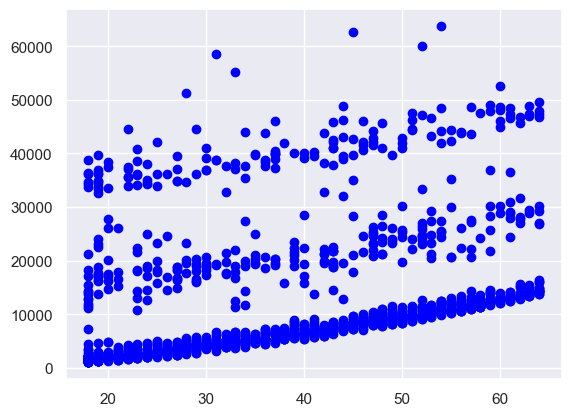

In [69]:
plt.scatter(df['age'], df['charges'], color='blue')
plt.show()

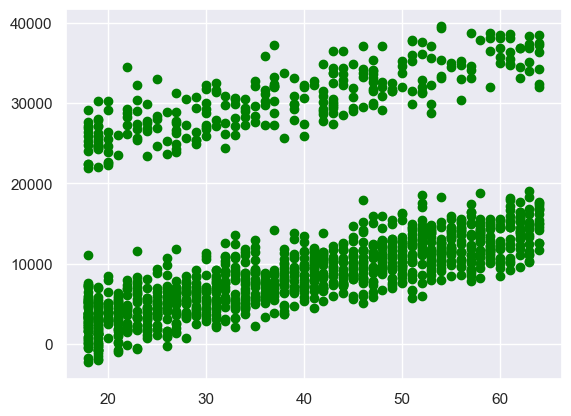

In [70]:
plt.scatter(df['age'], df['Predicted Charges'], color='green')
plt.show()

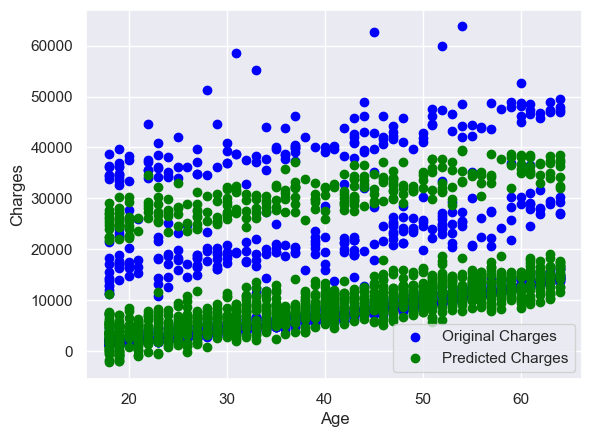

In [72]:
plt.scatter(df['age'], df['charges'], color='blue', label='Original Charges')
plt.scatter(df['age'], df['Predicted Charges'], color='green', label='Predicted Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()